In [10]:
import numpy as np

x = np.linspace(0, 2*np.pi, num=200)

sin_arr = [np.sin(i) for i in x]
cos_arr= [np.cos(i) for i in x]
abs_sin_arr = [np.abs(np.sin(i)) for i in x]
abs_cos_arr= [np.abs(np.cos(i)) for i in x]
sigmoid_arr = [1/(1 + np.exp(-(i-np.pi)*3)) for i in x]
# sigmoid_arr  




[8.069300568367465e-05,
 8.87093477993886e-05,
 9.752198536764477e-05,
 0.00010721000141507726,
 0.00011786032961610744,
 0.00012956853292975907,
 0.00014243965931567506,
 0.00015658918212893585,
 0.00017214403353614852,
 0.00018924374010943095,
 0.0002080416706468932,
 0.000228706407245114,
 0.00025142325171863375,
 0.0002763958806318512,
 0.00030384816348886417,
 0.0003340261600263081,
 0.00036720031408328253,
 0.0004036678631920023,
 0.00044375548485442494,
 0.0004878222024560102,
 0.0005362625759309228,
 0.0005895102046467454,
 0.00064804157253522,
 0.0007123802682727932,
 0.0007831016163254963,
 0.0008608377579312587,
 0.0009462832246133261,
 0.0010402010506144056,
 0.0011434294747245941,
 0.001256889286357502,
 0.001381591875415746,
 0.0015186480504832817,
 0.0016692776951871058,
 0.0018348203381772976,
 0.002016746718067103,
 0.002216671430827836,
 0.002436366753507958,
 0.002677777744686574,
 0.002943038728702935,
 0.0032344912773251805,
 0.003554703809001681,
 0.00390649293200

In [11]:

np.savetxt('tables.csv', (x, sin_arr,abs_sin_arr,cos_arr,abs_cos_arr,sigmoid_arr), delimiter=',')


In [23]:
import numpy as np
csv = np.genfromtxt ('tables.csv', delimiter=",")
sin_arr = csv[1,:] # first row, everything
cos_arr = csv[3,:] # first row, everything


In [19]:

class rInputs:
    def __init__(self, conc, vflow,type,time):
        self.conc = conc
        self.vflow = vflow
        self.type = type
        self.time=time

    def sin_flow(self,type_arr,time,conc):
        self.time+=8
        if self.time>=200:
            self.time = 0
        return conc*type_arr[time]

    def cos_flow(self,type_arr,time,conc):
        self.time+=8
        if self.time>=200:
            self.time = 0
        return conc*type_arr[time]

    
    
    def manage_flow(self,type_arr):
        if self.type == "sin":
            return self.sin_flow(type_arr,self.time,self.conc)
        elif self.type == "cos":
            return self.cos_flow(type_arr,self.time,self.conc)

In [56]:
r = rInputs(1,50,"sin",0)
g = rInputs(0,50,"sin",0)
b = rInputs(1,50,"cos",0)
# r.manage_flow(sin_arr)
v_max=1000
r_conc=0
g_conc=0
b_conc=0
v=0
rdata=[]
gdata=[]

bdata=[]

In [57]:
for i in range(25):
    # input
    total_vflow=r.vflow+g.vflow+b.vflow
    r_conc=(r_conc*total_vflow+r.manage_flow(abs(sin_arr))*r.vflow)/total_vflow
    g_conc=(g_conc*total_vflow+g.manage_flow(sin_arr)*g.vflow)/total_vflow
    b_conc=(b_conc*total_vflow+b.manage_flow(abs(cos_arr))*b.vflow)/total_vflow
    print(r_conc,g_conc,b_conc)
    # generation
    # g_conc+=0.7*r_conc + 0.2*b_conc - 0.85*g_conc
    # b_conc+=0.85*g_conc -0.8*b_conc
    # r_conc+=0.6*b_conc - 0.7*r_conc
    g_conc+= 0.2*b_conc - 0.7*r_conc
    b_conc+=0.7*r_conc -0.2*b_conc
    r_conc+= - 0.7*r_conc
    print(r_conc,g_conc,b_conc)
    v+=total_vflow
    outv = max(v-v_max,0)

    rdata.append(r_conc)
    gdata.append(g_conc)
    bdata.append(b_conc)

0.0 0.0 0.3333333333333333
0.0 0.06666666666666667 0.26666666666666666
0.08330432079010278 0.06666666666666667 0.5894227684661691
0.024991296237030836 0.12623819580682855 0.5298512393260073
0.18631316328464376 0.12623819580682855 0.8215469134855385
0.05589394898539313 0.16012836420468562 0.7876567450876815
0.2849953298551212 0.16012836420468562 1.029779995509228
0.08549859895653639 0.16658763240794638 1.0233207273059672
0.3678399435473027 0.16658763240794638 1.2005055919129344
0.1103519830641908 0.14920079030742137 1.2178924340134594
0.4280149527361372 0.14920079030742137 1.318894160782417
0.12840448582084119 0.11336915554860874 1.3547257955412295
0.4612291118943008 0.11336915554860873 1.3731344725760655
0.13836873356829027 0.06513567173781128 1.4213679563868629
0.46523283726242504 0.06513567173781128 1.4867206061215221
0.13956985117872756 0.03681680687841822 1.5150394709809152
0.4397295286643114 0.03681680687841822 1.660005946839513
0.13191885859929342 0.06100732618130285 1.6358154275

In [56]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 27.0 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB ? eta 0:00:00
     ------------------------------------- 930.9/930.9 KB 29.7 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 42.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\PC\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


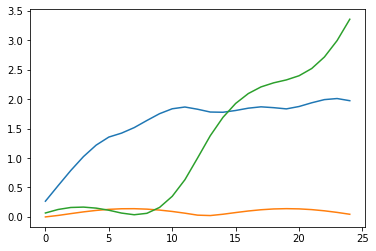

In [58]:
import matplotlib.pyplot as plt

times=25
x = range(0,times,1)
# rdata=[r.manage_flow(sin_arr)for i in range(times)]
# gdata=[g.manage_flow(sin_arr)for i in range(times)]
# bdata=[b.manage_flow(cos_arr)for i in range(times)]
fig, ax = plt.subplots()
ax.plot(x, bdata)
ax.plot(x, rdata)
ax.plot(x, gdata)
plt.show()